## DRINKING WATER QUALITY

Dataset: The city of New York

### OBJECTIVES

### GUIDING QUESTIONS
1. Which sample class consistently demonstrates higher levels of key water quality indicators? (Tableau)
2. Trend over years of water quality indicators? (Tableau)
3. Which sample site has highest average chemical residues and microbial measurements like Coliform over years? (Tableau)
4. K means clustering water samples based on turbidity & residual free chlorine levels – Compliance Samples
5. Can we predict the classification of water samples as 'Compliance' or 'Operational' based on their residual free chlorine levels and coliform?


In [4]:
# !pip install scikit-learn
# !pip install matplotlib
# !pip install altair
# !pip install seaborn
# !pip install plotly
# !pip install --upgrade nbformat
# !pip install statsmodels

In [5]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import numpy as np
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### A. Data Wrangling 



In [6]:
# Load dataset
df_url='C:/Users/Admin/My Drive/MDSA/605/Water Quality.csv'
df = pd.read_csv(df_url)
#df.index += 1
df.head()

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,201655703,08/09/2016,10:31,43250,Compliance,0.68,0.74,NaN,<1,<1
1,201655704,08/09/2016,11:27,46850,Compliance,0.81,1.45,NaN,<1,<1
2,201655705,08/09/2016,10:14,50200,Operational,0.79,0.74,NaN,<1,<1
3,201655706,08/09/2016,12:12,50300,Operational,0.92,0.63,NaN,<1,<1
4,201655707,08/09/2016,10:17,76550,Compliance,0.06,0.6,NaN,<1,<1


In [7]:
# inspect data types
data_types = df.dtypes
print(data_types)

Sample Number                            int64
Sample Date                             object
Sample Time                             object
Sample Site                             object
Sample class                            object
Residual Free Chlorine (mg/L)          float64
Turbidity (NTU)                         object
Fluoride (mg/L)                         object
Coliform (Quanti-Tray) (MPN /100mL)     object
E.coli(Quanti-Tray) (MPN/100mL)         object
dtype: object


In [8]:
# null values
df.isnull().sum()

Sample Number                               0
Sample Date                                 0
Sample Time                                 0
Sample Site                                 3
Sample class                                0
Residual Free Chlorine (mg/L)              49
Turbidity (NTU)                            52
Fluoride (mg/L)                        123714
Coliform (Quanti-Tray) (MPN /100mL)       116
E.coli(Quanti-Tray) (MPN/100mL)           116
dtype: int64

In [9]:
# replace some special charaters in column coliform

df['Coliform (Quanti-Tray) (MPN /100mL)'] = df['Coliform (Quanti-Tray) (MPN /100mL)'].replace('<1', 0.9)
df['Coliform (Quanti-Tray) (MPN /100mL)'] = df['Coliform (Quanti-Tray) (MPN /100mL)'].replace('>200.5', 201)
df['E.coli(Quanti-Tray) (MPN/100mL)'] = df['E.coli(Quanti-Tray) (MPN/100mL)'].replace('<1', 0.9)
df['Turbidity (NTU)'] = df['Turbidity (NTU)'].replace('<0.10', 0.09)


print(df['Coliform (Quanti-Tray) (MPN /100mL)'])
print(df['E.coli(Quanti-Tray) (MPN/100mL)'])

0         0.9
1         0.9
2         0.9
3         0.9
4         0.9
         ... 
142527    0.9
142528    0.9
142529    0.9
142530    0.9
142531    0.9
Name: Coliform (Quanti-Tray) (MPN /100mL), Length: 142532, dtype: object
0         0.9
1         0.9
2         0.9
3         0.9
4         0.9
         ... 
142527    0.9
142528    0.9
142529    0.9
142530    0.9
142531    0.9
Name: E.coli(Quanti-Tray) (MPN/100mL), Length: 142532, dtype: object


In [10]:
## Replace special values to numerical format
# Define a mapping of values to convert
values_to_convert = {'1S03':1001,'1S03A':1002, '1S03B':1003, '1S04':1004, '1S07':1005,'1SCH3':1006,'1SCH4':1007, '1SCHA':1008, '1SCL1':1009, '3ISL3':1010, '3ISL4':1011, '3SC26':1012, '4ISL5':1013}

# Replace the values in the DataFrame
df['Sample Site'] = df['Sample Site'].replace(values_to_convert)

In [11]:
# convert object to float
df['Coliform (Quanti-Tray) (MPN /100mL)'] = df['Coliform (Quanti-Tray) (MPN /100mL)'].astype(float)
df['E.coli(Quanti-Tray) (MPN/100mL)'] = df['E.coli(Quanti-Tray) (MPN/100mL)'].astype(float)
df['Turbidity (NTU)'] = df['Turbidity (NTU)'].astype(float)
df['Sample Site'] = df['Sample Site'].astype(float)
data_types = df.dtypes
print(data_types)

Sample Number                            int64
Sample Date                             object
Sample Time                             object
Sample Site                            float64
Sample class                            object
Residual Free Chlorine (mg/L)          float64
Turbidity (NTU)                        float64
Fluoride (mg/L)                         object
Coliform (Quanti-Tray) (MPN /100mL)    float64
E.coli(Quanti-Tray) (MPN/100mL)        float64
dtype: object


In [12]:
data_types = df.dtypes
print(data_types)
df.isnull().sum()

Sample Number                            int64
Sample Date                             object
Sample Time                             object
Sample Site                            float64
Sample class                            object
Residual Free Chlorine (mg/L)          float64
Turbidity (NTU)                        float64
Fluoride (mg/L)                         object
Coliform (Quanti-Tray) (MPN /100mL)    float64
E.coli(Quanti-Tray) (MPN/100mL)        float64
dtype: object


Sample Number                               0
Sample Date                                 0
Sample Time                                 0
Sample Site                                 3
Sample class                                0
Residual Free Chlorine (mg/L)              49
Turbidity (NTU)                            52
Fluoride (mg/L)                        123714
Coliform (Quanti-Tray) (MPN /100mL)       116
E.coli(Quanti-Tray) (MPN/100mL)           116
dtype: int64

In [13]:
# # export to csv file
# df.to_csv('Water Quality01.csv', index=False) 

In [14]:
# drop NA so we can perform K clustering
df = df.dropna(subset=['Turbidity (NTU)'])
df = df.dropna(subset=['Residual Free Chlorine (mg/L)'])
df = df.dropna(subset=['Coliform (Quanti-Tray) (MPN /100mL)'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142412 entries, 0 to 142531
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Sample Number                        142412 non-null  int64  
 1   Sample Date                          142412 non-null  object 
 2   Sample Time                          142412 non-null  object 
 3   Sample Site                          142409 non-null  float64
 4   Sample class                         142412 non-null  object 
 5   Residual Free Chlorine (mg/L)        142412 non-null  float64
 6   Turbidity (NTU)                      142412 non-null  float64
 7   Fluoride (mg/L)                      18811 non-null   object 
 8   Coliform (Quanti-Tray) (MPN /100mL)  142412 non-null  float64
 9   E.coli(Quanti-Tray) (MPN/100mL)      142412 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 12.0+ MB


### B. EDA

<Figure size 1500x600 with 0 Axes>

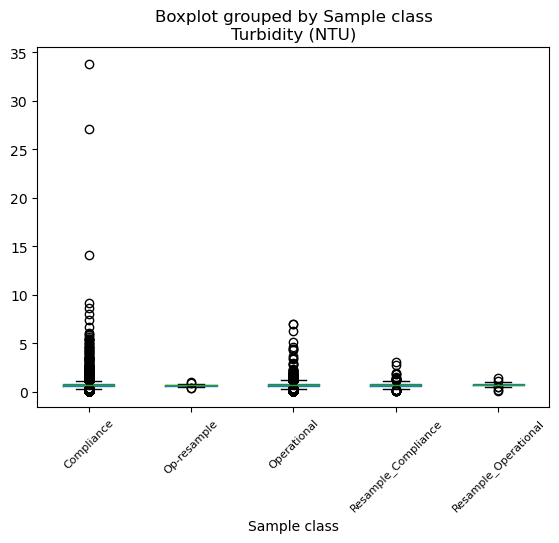

In [16]:
# @title Coliform by Sample class

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
ax=df.boxplot(by='Sample class', column='Turbidity (NTU)', grid=False)
plt.xticks(rotation=45, fontsize=8)
plt.show()

<Figure size 1500x600 with 0 Axes>

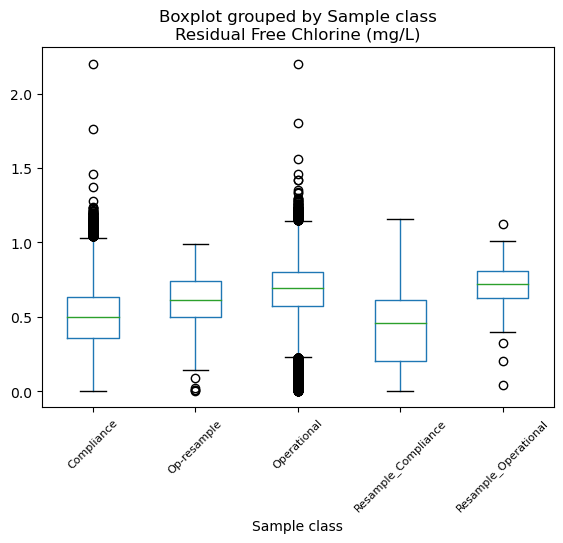

In [17]:
# @title Residual by Sample class

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
ax=df.boxplot(by='Sample class', column='Residual Free Chlorine (mg/L)', grid=False)
plt.xticks(rotation=45, fontsize=8)
plt.show()

<Figure size 1500x600 with 0 Axes>

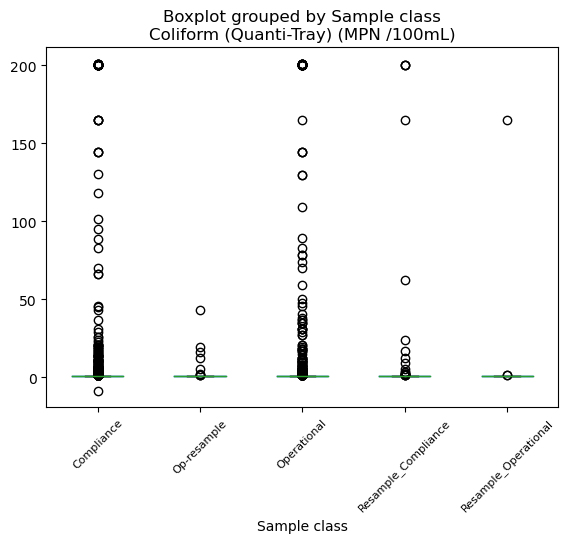

In [18]:
# @title Coliform by Sample class

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
ax=df.boxplot(by='Sample class', column='Coliform (Quanti-Tray) (MPN /100mL)', grid=False)
plt.xticks(rotation=45, fontsize=8)
plt.show()

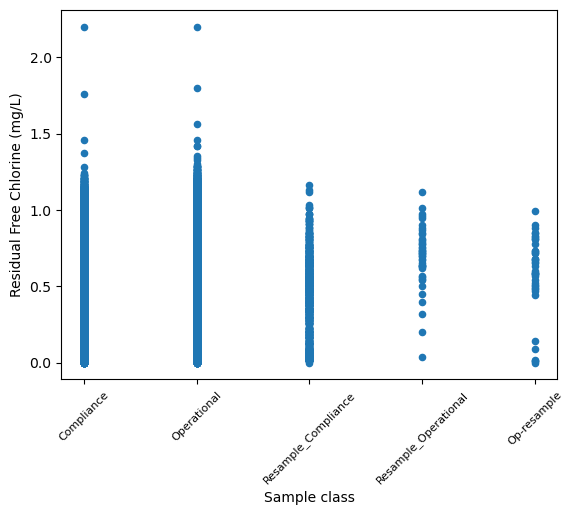

In [19]:
# prompt: generate scatter plot

df.plot.scatter(x='Sample class', y='Residual Free Chlorine (mg/L)')
plt.xticks(rotation=45, fontsize=8)
plt.show()

#df_frame.boxplot(by='Education', column='LoanAmount', grid=False)
#plt.show()

### C. K-means Analysis 
K means clustering water samples based on turbidity & residual free chlorine levels – Compliance Samples

In [20]:
##Load Libraries for PCA
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import pandas as pd # pandas

In [21]:
# Filter the DataFrame to include only specific rows where 'Sample Class' is either 'Compliance' or 'Resampling Compliance'
filtered_df = df[df['Sample class'].isin(['Compliance', 'Resample_Compliance'])]
df01 = filtered_df[['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)']]
df01.head()

,Residual Free Chlorine (mg/L),Turbidity (NTU)
0,0.68,0.74
1,0.81,1.45
4,0.06,0.60
5,0.13,0.75
11,0.61,2.53


In [22]:
# Standardize (scale, recenter) the height and weight columns - otherwise distances will mostly be based on weight
scaler = skp.StandardScaler()
df01_standardized = scaler.fit_transform(df01)
df01_standardized = pd.DataFrame(df01)
df01_standardized.columns = df01.columns
df01_standardized.head()

,Residual Free Chlorine (mg/L),Turbidity (NTU)
0,0.68,0.74
1,0.81,1.45
4,0.06,0.60
5,0.13,0.75
11,0.61,2.53


**Run PCA on the feature set dataframe**

In [23]:
# prompt: Generate principal components for table above
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
df01_pca = pca.fit_transform(df01_standardized)
df01_pca = pd.DataFrame(df01_pca)
df01_pca.columns = ['PC1', 'PC2']
df01_pca.head()


,PC1,PC2
0,0.036452,-0.183968
1,0.757986,-0.203688
2,-0.196858,0.407273
3,-0.037906,0.361074
4,1.794610,0.159370


In [24]:
# prompt: load all pca score with column names

pca_columns = ['PC' + str(i) for i in range(1, len(df01_pca.columns) + 1)]
df01_pca.columns = pca_columns
df01_pca.head()


,PC1,PC2
0,0.036452,-0.183968
1,0.757986,-0.203688
2,-0.196858,0.407273
3,-0.037906,0.361074
4,1.794610,0.159370


**Explained variance for each PC**

In [25]:
# prompt: generate the explain variance for the table above

pca_variances = pca.explained_variance_ratio_
pca_variances = pd.DataFrame(pca_variances)
pca_variances.columns = ['Explained Variance']
pca_variances.index = pca_columns
print(pca_variances)


     Explained Variance
PC1            0.647324
PC2            0.352676


In [26]:
# prompt: generate cumulative variance and explained variance

df01_pca['Cumulative Variance'] = df01_pca['PC1'] + df01_pca['PC2']
df01_pca.head()

pca_variances['Cumulative Variance'] = pca_variances['Explained Variance'].cumsum()
pca_variances.head()


,Explained Variance,Cumulative Variance
PC1,0.647324,0.647324
PC2,0.352676,1.000000


In [27]:
# prompt: plot the table above
import plotly.express as px
fig = px.bar(pca_variances, x=pca_columns, y='Explained Variance', title='Explained Variance by PC',
             labels={'Explained Variance': 'Explained Variance', 'PC': 'PC'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()
fig = px.bar(pca_variances, x=pca_columns, y='Cumulative Variance', title='Cumulative Variance by PC',
             labels={'Cumulative Variance': 'Cumulative Variance', 'PC': 'PC'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()


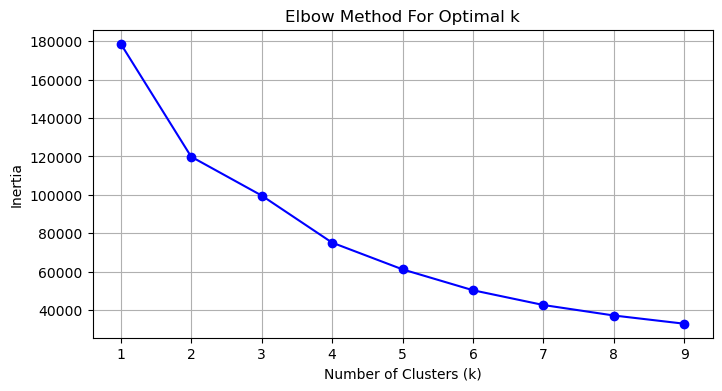

In [28]:
# Elbow Method is a common technique used to determine the optimal number of clusters
# Selecting relevant features
from sklearn.cluster import KMeans
data = df01_standardized[['Turbidity (NTU)', 'Residual Free Chlorine (mg/L)']]

# It's a good practice to scale your data for k-means clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Range of k we want to try
k_values = range(1, 10)
inertias = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(data_scaled)
    inertias.append(model.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

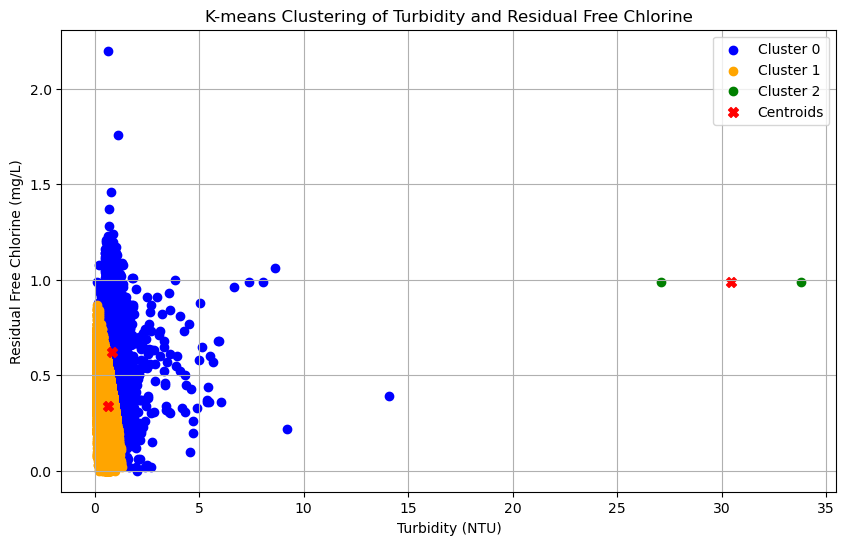

In [35]:
# Applying K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df01_standardized['Cluster'] = kmeans.fit_predict(df01_standardized[['Turbidity (NTU)', 'Residual Free Chlorine (mg/L)']])

# Plotting the results
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']  # Color for each cluster
for cluster in df01_standardized['Cluster'].unique():
    clustered_data = df01_standardized[df01_standardized['Cluster'] == cluster]
    plt.scatter(clustered_data['Turbidity (NTU)'], clustered_data['Residual Free Chlorine (mg/L)'], label=f'Cluster {cluster}', color=colors[cluster])
    
# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering of Turbidity and Residual Free Chlorine')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Residual Free Chlorine (mg/L)')
#plt.xticks(range(min(df['Turbidity (NTU)']), max(df['Turbidity (NTU)'])+1))  # Setting x-ticks to show all encoded values
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# remove outliers
import pandas as pd

# Calculate Q1 and Q3
Q1A = df01_standardized[['Turbidity (NTU)', 'Residual Free Chlorine (mg/L)']].quantile(0.25)
Q3A = df01_standardized[['Turbidity (NTU)', 'Residual Free Chlorine (mg/L)']].quantile(0.75)

# Compute the IQR by subtracting Q1 from Q3
IQRA = Q3A - Q1A

# Filter out outliers
outliers = (
    (df01_standardized['Turbidity (NTU)'] >= (Q1A['Turbidity (NTU)'] - 1.5 * IQRA['Turbidity (NTU)'])) &
    (df01_standardized['Turbidity (NTU)'] <= (Q3A['Turbidity (NTU)'] + 1.5 * IQRA['Turbidity (NTU)'])) &
    (df01_standardized['Residual Free Chlorine (mg/L)'] >= (Q1A['Residual Free Chlorine (mg/L)'] - 1.5 * IQRA['Residual Free Chlorine (mg/L)'])) &
    (df01_standardized['Residual Free Chlorine (mg/L)'] <= (Q3A['Residual Free Chlorine (mg/L)'] + 1.5 * IQRA['Residual Free Chlorine (mg/L)']))
)

# Apply the filter to the DataFrame to exclude outliers
df01_filtered= df01_standardized[outliers]

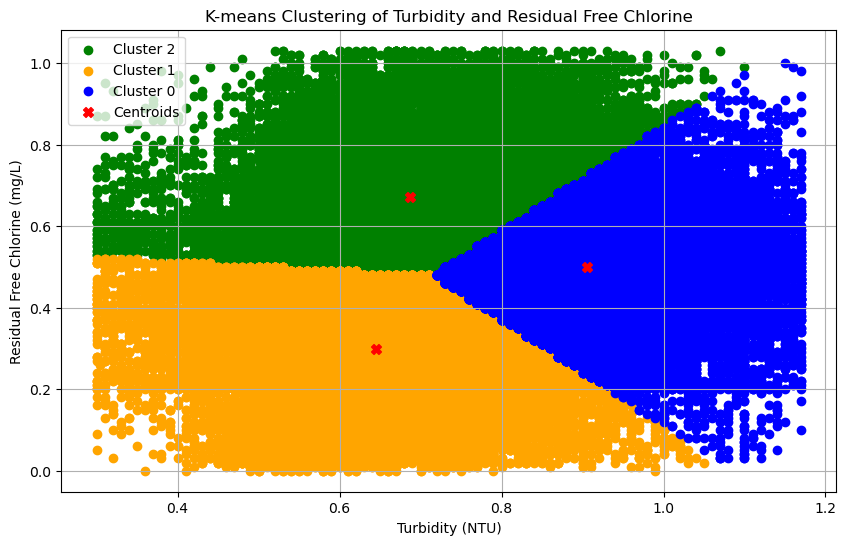

In [41]:
# Applying K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df01_filtered['Cluster'] = kmeans.fit_predict(df01_filtered[['Turbidity (NTU)', 'Residual Free Chlorine (mg/L)']])

# Plotting the results
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']  # Color for each cluster
for clust in df01_filtered['Cluster'].unique():
    clust_data = df01_filtered[df01_filtered['Cluster'] == clust]
    plt.scatter(clust_data['Turbidity (NTU)'], clust_data['Residual Free Chlorine (mg/L)'], label=f'Cluster {clust}', color=colors[clust])
    
# Plot centroids
centroids01 = kmeans.cluster_centers_
plt.scatter(centroids01[:, 0], centroids01[:, 1], s=50, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering of Turbidity and Residual Free Chlorine')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Residual Free Chlorine (mg/L)')
#plt.xticks(range(min(df['Turbidity (NTU)']), max(df['Turbidity (NTU)'])+1))  # Setting x-ticks to show all encoded values
plt.legend()
plt.grid(True)
plt.show()

#### Confusion Matrix

In [31]:
df01_standardized

,Residual Free Chlorine (mg/L),Turbidity (NTU)
0,0.68,0.74
1,0.81,1.45
4,0.06,0.60
5,0.13,0.75
11,0.61,2.53
...,...,...
142525,0.04,0.79
142528,0.26,0.78
142529,0.33,0.79
142530,0.33,0.83


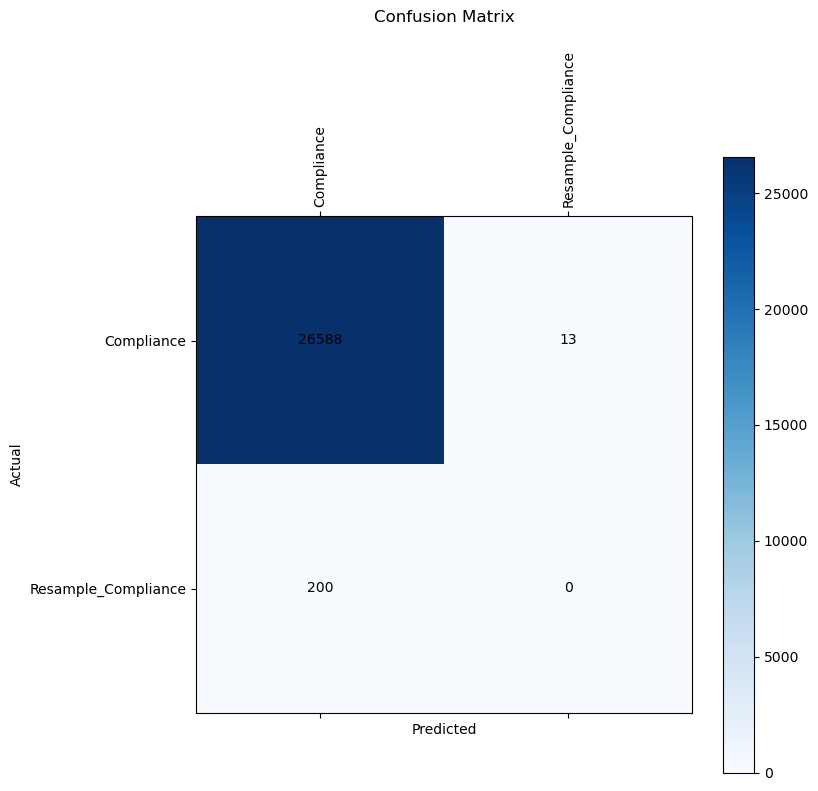

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'df' is your initial DataFrame already loaded with data
# Filter the DataFrame to include only specific rows where 'Sample Class' is either 'Compliance' or 'Resampling Compliance'
filtered_df = df[df['Sample class'].isin(['Compliance', 'Resample_Compliance'])]
df01 = filtered_df[['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)']]

# Standardize the selected columns
scaler = StandardScaler()
df01_standardized = scaler.fit_transform(df01)
df01_standardized = pd.DataFrame(df01_standardized, columns=df01.columns)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df01_standardized,
    filtered_df['Sample class'],  # Ensure to use the filtered_df for corresponding target values
    test_size=0.3, random_state=42)

# Creating and training the KNeighborsClassifier model
df_neigh = KNeighborsClassifier(n_neighbors=3)
df_neigh.fit(X_train, y_train)

# Making predictions
y_pred = df_neigh.predict(X_test)

# Generating the confusion matrix
labels = np.unique(filtered_df['Sample class'])
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Displaying the confusion matrix with labels and scores
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix', pad=20)
fig.colorbar(cax)

# Set labels for axes
ax.set_xticklabels([''] + list(labels), rotation=90)
ax.set_yticklabels([''] + list(labels))

# Display the scores on the confusion matrix
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### D. Classification_ Logistic Regression
Can we predict the classification of water samples as 'Compliance' or 'Operational' based on their residual free chlorine levels and coliform?

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Filter necessary columns
df_filtered = df[['Sample class', 'Residual Free Chlorine (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)']]

# Convert Sample Class into a binary variable
df_filtered['Sample class'] = df_filtered['Sample class'].apply(lambda x: 1 if x == 'Compliance' else 0)

# Split the dataset into training and testing sets
X = df_filtered[['Residual Free Chlorine (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)']]
y = df_filtered['Sample class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.707307368223949
Confusion Matrix:
 [[ 8100  8179]
 [ 4326 22119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.50      0.56     16279
           1       0.73      0.84      0.78     26445

    accuracy                           0.71     42724
   macro avg       0.69      0.67      0.67     42724
weighted avg       0.70      0.71      0.70     42724



#### Log Regression Formula 

In [34]:
# # Assuming 'model' is your trained Logistic Regression model
# intercept = model.intercept_
# coefficients = model.coef_

# print("Intercept (β0):", intercept)
# print("Coefficients (β1, β2, ...):", coefficients)

# Assuming 'model' is your trained Logistic Regression model
intercept = model.intercept_[0]  # Intercept β0
coefficients = model.coef_[0]    # Coefficients β1, β2 for each feature

# Feature names, corresponding to x1, x2
features = ['Residual Free Chlorine (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)']

# Constructing the formula string
formula = f"p = 1 / (1 + exp(-({intercept:.4f}"
for coef, feature in zip(coefficients, features):
    formula += f" + {coef:.4f}*{feature}"
formula += ")))"

print("Logistic Regression Formula:")
print(formula)

Logistic Regression Formula:
p = 1 / (1 + exp(-(3.4886 + -5.0594*Residual Free Chlorine (mg/L) + -0.0068*Coliform (Quanti-Tray) (MPN /100mL))))


#### Boundaries Plot 

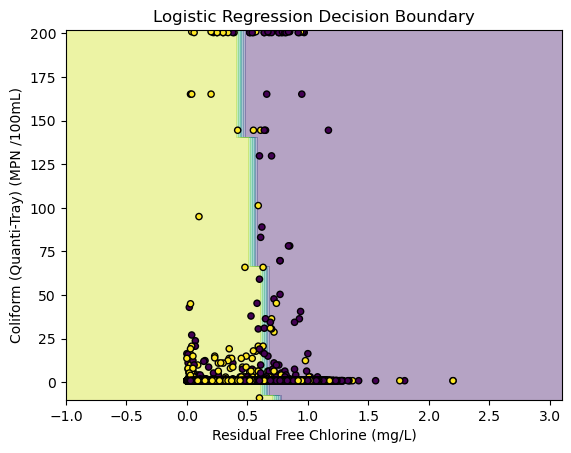

In [36]:
# Ensure X_train and X_test are numpy arrays if not already
X_train = X_train.values
X_test = X_test.values

# Plotting decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Residual Free Chlorine (mg/L)')
plt.ylabel('Coliform (Quanti-Tray) (MPN /100mL)')
plt.show()

#### Confusion Matrix

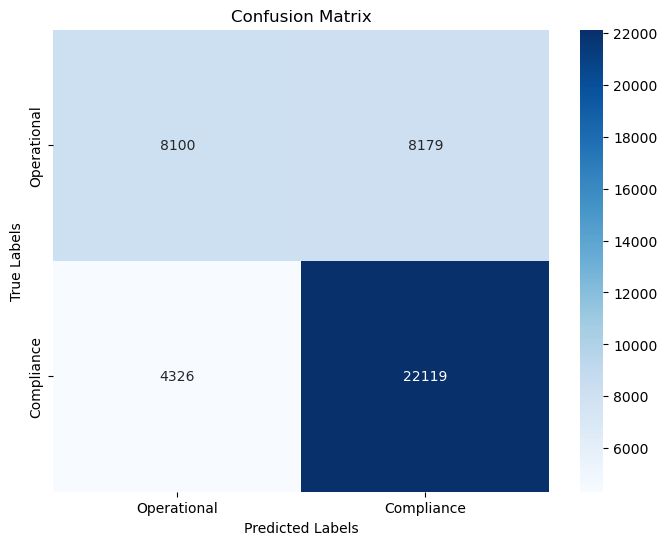

In [62]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Operational', 'Compliance']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

